In [1]:
#%pip install hmmlearn

In [2]:
import numpy as np
import math
np.random.seed(111)
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm, pyplot as plt

from hmmlearn.hmm import GaussianHMM
#import fix_yahoo_finance as yf # The library fetching the stock prices
import pickle
from sklearn.utils import check_random_state

# Task 2: Hidden Markov Model

## Task 2.1: Generate sample from GaussianHMM

In [24]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array( [[0.0, 0.0],
                   [0.0, 11.0],
                   [9.0, 10.0],
                   [11.0, -1.0]])
# The covariance of each component
covars =  0.5*np.tile(np.ones([1, 2]),(4, 1))

# Build an HMM instance and set parameters
#ghmm0 = GaussianHMM(n_components=4, covariance_type='full', algorithm=algorithm0)
ghmm0 = GaussianHMM(n_components=4)

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
ghmm0.startprob_ = startprob
ghmm0.transmat_ = transmat
ghmm0.means_ = means
ghmm0.covars_ = covars
print ("startprob\n", startprob)
print ("transmat\n", transmat)
print ("means\n", means)
print ('covars\n', covars)

startprob
 [0.6 0.3 0.1 0. ]
transmat
 [[0.7 0.2 0.  0.1]
 [0.3 0.5 0.2 0. ]
 [0.  0.3 0.5 0.2]
 [0.2 0.  0.2 0.6]]
covars
 [[ 0.  0.]
 [ 0. 11.]
 [ 9. 10.]
 [11. -1.]]
covars
 [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


### Task 2.1.1: Sampling from an HMM model

In [4]:
warnings.filterwarnings('ignore')
idx0 = 0

n_iter = 3
n_samples = 15
x0 = np.zeros((n_iter,n_samples,2))
z0 = np.zeros((n_iter,n_samples))
for i in  range(n_iter):
    x0[i], z0[i] = ghmm0.sample(n_samples)

print ('x0\n', x0[idx0])
print ('z0', z0[idx0])

x0
 [[-0.16848186 10.12801237]
 [-0.55687031 10.67512763]
 [-1.05147365 -0.32099545]
 [ 0.16892366 -0.41713662]
 [-0.18531897 -1.23850943]
 [ 0.34789866  0.30028859]
 [ 0.01706083 11.10839503]
 [ 8.71144231  9.9519538 ]
 [ 9.41499349 11.25687705]
 [-0.21953733 12.69330135]
 [-0.64351402 11.82751474]
 [ 0.24762349 10.89976301]
 [ 8.93983186 10.98531439]
 [ 9.76691612 -1.56509066]
 [ 0.17218648 -1.07282541]]
z0 [1. 1. 0. 0. 0. 0. 1. 2. 2. 1. 1. 1. 2. 3. 0.]


In [5]:
print ('x0\n', x0[1])
print ('z0', z0[1])

x0
 [[-2.36458178e-01 -2.16393859e-01]
 [ 1.10268020e+00 -1.27395792e-01]
 [ 1.47281643e+00 -9.08383138e-01]
 [-3.27607971e-03  6.42239503e-01]
 [-6.68418845e-01  3.82666666e-01]
 [-5.44376551e-01  1.09773592e+01]
 [-3.14364721e-01  9.44153008e+00]
 [-6.25384586e-01  2.66740077e-01]
 [ 1.12455483e+01 -1.19532803e+00]
 [ 1.17397860e+01 -1.63978923e+00]
 [ 1.14309864e+01 -1.41306035e+00]
 [-7.06773328e-01 -4.63183857e-01]
 [ 1.11895532e+01 -5.60188477e-01]
 [ 5.49338968e-01  1.76972352e-01]
 [ 4.23800582e-01  1.52316243e-01]]
z0 [0. 0. 0. 0. 0. 1. 1. 0. 3. 3. 3. 0. 3. 0. 0.]


In [6]:
print ('x0\n', x0[2])
print ('z0', z0[2])

x0
 [[ 0.23457245  0.160677  ]
 [-0.26105583 -0.72827484]
 [ 1.31592531 -1.67068609]
 [-0.21839317  1.48713214]
 [-0.16402666 -0.70312786]
 [ 0.0733407  -0.02369465]
 [ 0.36072963  0.59995614]
 [10.02987454 -0.68486892]
 [10.94658557 -1.30825047]
 [ 8.87757207  9.34549608]
 [11.54674369 -1.65859336]
 [11.15872142 -1.33970802]
 [ 9.85127866  9.73217442]
 [-1.79128833 11.46099763]
 [ 9.0029333  10.92693438]]
z0 [0. 0. 0. 0. 0. 0. 0. 3. 3. 2. 3. 3. 2. 1. 2.]


### Task 2.1.3: Posterior Probability

In [7]:
POSTERIOR0 = ghmm0.predict_proba(x0[0])
POSTERIOR0[POSTERIOR0<1e-10] = 0
print (POSTERIOR0)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


## Task 2.2: Learn another HMM from Samples

### Task 2.2.1: Choose one and fit ont it

In [23]:
ghmm1 = GaussianHMM(n_components=4, n_iter=500)
ghmm1.fit(x0[0])
print ("startprob\n",ghmm1.startprob_)
print ("transmat\n", ghmm1.transmat_)
print ("means\n",ghmm1.means_)
print ("covars\n",ghmm1.covars_)

Fitting a model with 31 free scalar parameters with only 30 data points will result in a degenerate solution.


startprob
 [1. 0. 0. 0.]
transmat
 [[8.00000000e-001 1.02207811e-208 2.00000000e-001 0.00000000e+000]
 [1.00000000e+000 2.05323770e-309 0.00000000e+000 4.50905891e-216]
 [1.97516241e-300 5.00000000e-001 0.00000000e+000 5.00000000e-001]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]]
means
 [[-0.17013664  5.87117598]
 [ 9.41499349 11.25687705]
 [ 8.82563708 10.46863409]
 [ 9.76691612 -1.56509066]]
covars
 [[[1.70286516e-01 0.00000000e+00]
  [0.00000000e+00 3.48755050e+01]]

 [[1.00000000e-02 0.00000000e+00]
  [0.00000000e+00 1.00000000e-02]]

 [[1.80404465e-02 0.00000000e+00]
  [0.00000000e+00 2.71958530e-01]]

 [[1.00000000e-02 0.00000000e+00]
  [0.00000000e+00 1.00000000e-02]]]


### Task 2.2.2: Concatenate 3 sequences

In [9]:
lengthscon = np.array([15, 15, 15])
xcon = np.concatenate([x0[0], x0[1], x0[2]])
ghmm1con = GaussianHMM(n_components=4, n_iter=500)
ghmm1con.fit(xcon, lengthscon)
print ("startprob\n",ghmm1con.startprob_)
print ("transmat\n", ghmm1con.transmat_)
print ("means\n",ghmm1con.means_)
print ("covars\n",ghmm1con.covars_)

startprob
 [3.33333333e-001 6.66666667e-001 0.00000000e+000 1.85209905e-286]
transmat
 [[4.44444444e-001 2.22222222e-001 3.33333333e-001 1.24511863e-120]
 [1.05263158e-001 7.36842105e-001 2.39189962e-163 1.57894737e-001]
 [4.00000000e-001 2.50313668e-160 2.00000000e-001 4.00000000e-001]
 [6.20682474e-136 3.33333333e-001 2.22222222e-001 4.44444444e-001]]
means
 [[-0.44152764 11.02355567]
 [ 0.1000778  -0.17721992]
 [ 9.13300861 10.36645835]
 [11.00607948 -1.26276417]]
covars
 [[[0.302419   0.        ]
  [0.         0.78740196]]

 [[0.40207535 0.        ]
  [0.         0.5049387 ]]

 [[0.15043836 0.        ]
  [0.         0.51940929]]

 [[0.40305977 0.        ]
  [0.         0.14032571]]]


### Task 2.2.3: Predict states

In [10]:
z1 = ghmm0.predict(x0[0])
z2 = ghmm1.predict(x0[0])
print ('z0', z0[idx0].astype(int))
print ('z1', z1)
print ('z2', z2)

z0 [1 1 0 0 0 0 1 2 2 1 1 1 2 3 0]
z1 [1 1 0 0 0 0 1 2 2 1 1 1 2 3 0]
z2 [1 0 3 1 3 1 0 2 2 1 0 0 2 3 1]


## Task 2.3: HMM inference for real: Stock Market Prediction

In [11]:
"""
quotes = pickle.load(open('my_quotes.obj', 'rb'))
"""
try:
    with open('my_quotes_1.obj', 'rb') as fo:
        quotes = pickle.load(fo)
except:
    with open('my_quotes_1.obj', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        quotes = u.load()

In [12]:
diff_c = np.diff(quotes.Close)

In [13]:
binom1 = np.column_stack([diff_c[:100], quotes.Volume[1:101]/3e7])

In [14]:
ghmm2 = GaussianHMM(n_components=3, covariance_type='diag')
ghmm2.fit(binom1)

GaussianHMM(n_components=3)

In [15]:
states = ghmm2.predict(binom1)

### Task 2.3.1: New Model for Stock

In [16]:
print ("startprob\n",ghmm2.startprob_)
print ("transmat\n", ghmm2.transmat_)
print ("means\n",ghmm2.means_)
print ("covars\n",ghmm2.covars_)

startprob
 [1.00000000e+000 8.46722712e-012 2.80782813e-146]
transmat
 [[8.69906689e-01 1.05710424e-01 2.43828862e-02]
 [3.55433717e-01 5.94646637e-01 4.99196453e-02]
 [1.05933071e-06 9.99998941e-01 1.03508511e-10]]
means
 [[ 0.03060726  0.64199775]
 [ 0.01656065  1.0046085 ]
 [-0.98340292  1.75570233]]
covars
 [[[0.04062596 0.        ]
  [0.         0.01431562]]

 [[0.15249465 0.        ]
  [0.         0.04223573]]

 [[0.05219071 0.        ]
  [0.         0.01818226]]]


### Task 2.3.2: Visualization of States

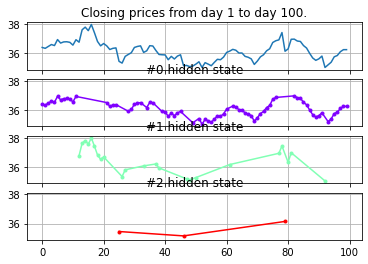

In [17]:
close_p = quotes.Close[1:101]
dates = np.arange(len(close_p))

fig, axs = plt.subplots(ghmm2.n_components+1, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, ghmm2.n_components))
axs[0].plot(dates, close_p)
axs[0].set_title("Closing prices from day 1 to day 100.")
axs[0].grid(True)
for i  in range(1,ghmm2.n_components+1):
    mask = states == i-1
    axs[i].plot(dates[mask], close_p[mask], ".-", c=colours[i-1])
    axs[i].set_title("#{0} hidden state".format(i-1))

    axs[i].grid(True)

plt.show()

### Task 2.3.3: Market Prediction

In [18]:
L=15 # We would like to predict the following 15 days' trend
Niter = 10 # A hyper parameter of generating samples

warnings.filterwarnings('ignore')
binom0 = np.column_stack([np.diff(quotes.Close), np.array(quotes.Volume)[1:]/3e7])
binom2 = np.copy(binom1)

startprob_cdf = np.cumsum(ghmm2.startprob_)
transmat_cdf = np.cumsum(ghmm2.transmat_, axis=1)
random_state = ghmm2.random_state

rs = check_random_state(None)

for l in range(L):
    binom2 = np.append(binom2,[[0,0]],axis=0) # Add a pair of empty (d,v)
    true_binom = np.copy(binom0[:len(binom1)+l])
    state_seq = ghmm2.predict(binom0[:len(binom1) + 1])
    previous_state = state_seq[-1]
    
    maxLL = -1e10
    for n in range(Niter):
        currstate = (transmat_cdf[previous_state]> rs.rand() ).argmax() # Go through transmat to get a new state
       
        new_sample = ghmm2.sample(L)[0][0] # generate from the new state
        tmp_binom = np.copy(true_binom)
        tmp_binom = np.append(tmp_binom,[new_sample],axis=0) # Append the new_sample for score
        tmp_maxLL = ghmm2.score(tmp_binom) # 
        if tmp_maxLL > maxLL :

                maxLL = tmp_maxLL
                binom2[-1][0] = new_sample[0]
                binom2[-1][1] = new_sample[1]

115


Text(0.5, 1.0, 'Closing Prices')

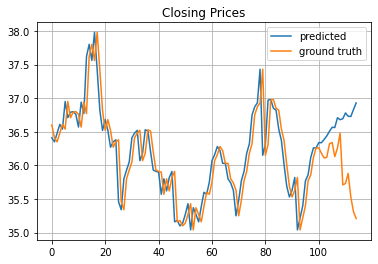

In [19]:
# The curve after day 100 is the predicted trend.

date2 = dates = np.arange(len(binom2))
print (len(date2))
plt.figure()
plt.plot(date2, quotes.Close[0]+np.cumsum(binom2[:,0]))
plt.plot(date2, quotes.Close[:len(binom1)+L])#[100:100+25])
plt.grid(True)
plt.legend(('predicted', 'ground truth'))
plt.title("Closing Prices")

Text(0.5, 1.0, 'Volume')

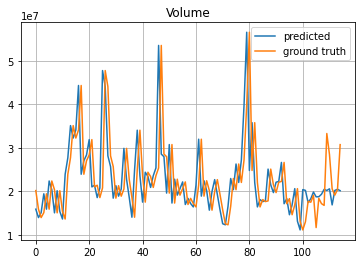

In [20]:
# The curve after day 100 is the predicted trend.

plt.figure()
plt.plot(date2, binom2[:,1]*3e7)
plt.plot(date2, quotes.Volume[0:len(binom1)+L])#[100:100+25])
plt.grid(True)
plt.legend(('predicted', 'ground truth'))
plt.title("Volume")